In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.api.types import is_numeric_dtype

In [2]:
df = pd.read_csv('student_final_data.csv')

In [3]:
df.head()

,Student_ID,First_Name,Last Name,Age,Gender,Library_weekly_hours,Class_weekly_attendance_percentage,Extra-curricular_weekly_hours,Previous_Exam_Score,Father_Occupation,Mother_Occupation,Parent_Income_Level
0,S001,Tunde,Ibe,16,Female,7,36.7,12,31,Doctor,Teacher,Medium
1,S002,Chinedu,Adamu,18,Male,9,41.7,7,51,Engineer,Unemployed,Medium
2,S003,Emeka,Eze,17,Male,1,31.7,9,15,Doctor,Doctor,Low
3,S004,Ibrahim,Adebayo,18,Male,7,36.7,13,29,Doctor,Farmer,High
4,S005,Ngozi,Mohammed,17,Male,5,46.7,12,35,Doctor,Civil Servant,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Student_ID                          200 non-null    object 
 1   First_Name                          200 non-null    object 
 2   Last Name                           200 non-null    object 
 3   Age                                 200 non-null    int64  
 4   Gender                              200 non-null    object 
 5   Library_weekly_hours                200 non-null    int64  
 6   Class_weekly_attendance_percentage  200 non-null    float64
 7   Extra-curricular_weekly_hours       200 non-null    int64  
 8   Previous_Exam_Score                 200 non-null    int64  
 9   Father_Occupation                   200 non-null    object 
 10  Mother_Occupation                   200 non-null    object 
 11  Parent_Income_Level                 200 non-n

In [5]:
# no null entries
df.isnull().sum()

Student_ID                            0
First_Name                            0
Last Name                             0
Age                                   0
Gender                                0
Library_weekly_hours                  0
Class_weekly_attendance_percentage    0
Extra-curricular_weekly_hours         0
Previous_Exam_Score                   0
Father_Occupation                     0
Mother_Occupation                     0
Parent_Income_Level                   0
dtype: int64

In [6]:
#no duplicates
df[df.duplicated()]

,Student_ID,First_Name,Last Name,Age,Gender,Library_weekly_hours,Class_weekly_attendance_percentage,Extra-curricular_weekly_hours,Previous_Exam_Score,Father_Occupation,Mother_Occupation,Parent_Income_Level


In [7]:
# further checks of duplication from student ID
# non found
df.Student_ID.nunique() # should be 200 (length of datafrane) if all unique

200

In [8]:
# the following columns would be dropped
# Father_Occupation and Mother_Occupation dont contain any information specific to the problem
# also column of Parent_Income_Level captures the economic value of these colums
df = df.drop(columns=['Student_ID','First_Name',"Last Name", 'Father_Occupation', 'Mother_Occupation'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 200 non-null    int64  
 1   Gender                              200 non-null    object 
 2   Library_weekly_hours                200 non-null    int64  
 3   Class_weekly_attendance_percentage  200 non-null    float64
 4   Extra-curricular_weekly_hours       200 non-null    int64  
 5   Previous_Exam_Score                 200 non-null    int64  
 6   Parent_Income_Level                 200 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.1+ KB


In [10]:
# examine numeric columns
# nothing seems out of place so far apart from the minimum age
df.describe()

,Age,Library_weekly_hours,Class_weekly_attendance_percentage,Extra-curricular_weekly_hours,Previous_Exam_Score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,16.875000,5.105000,46.801500,7.890000,41.605000
std,1.367011,2.895843,12.440356,4.439193,16.839442
min,11.000000,0.000000,25.000000,0.000000,1.000000
25%,16.000000,2.000000,35.000000,4.000000,31.000000
50%,17.000000,5.000000,46.700000,8.000000,43.000000
75%,18.000000,7.000000,60.000000,12.000000,51.000000
max,20.000000,10.000000,66.700000,15.000000,85.000000


In [11]:
# examine categorical columns
# we might need to exclude ages with minimal entries (11,14,20)
df['Age'].value_counts()

Age
17    50
16    48
18    41
15    32
19    26
14     1
11     1
20     1
Name: count, dtype: int64

In [12]:
# examine categorical columns
df['Gender'].value_counts()

Gender
Male      110
Female     90
Name: count, dtype: int64

In [13]:
# examine categorical columns
df['Parent_Income_Level'].value_counts()

Parent_Income_Level
High      80
Medium    63
Low       57
Name: count, dtype: int64

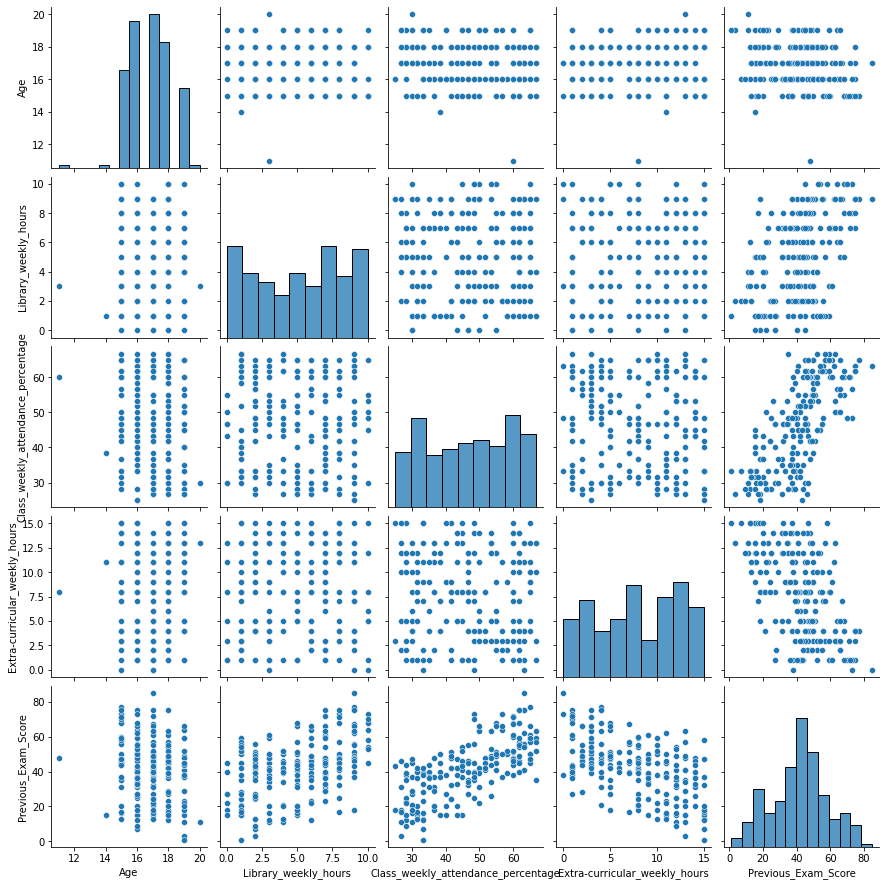

In [14]:
# lets visualize the data
sns.pairplot(df)

In [15]:
# Visually no outliers seem present apart from age 

In [16]:
# examining age further 
df['Age'].value_counts()

Age
17    50
16    48
18    41
15    32
19    26
14     1
11     1
20     1
Name: count, dtype: int64

In [17]:
# lets remove the ages 11,14,20 as there are only 1 entries each
# we also dont intend on creating bins for this
df = df[(df['Age'] != 11) & (df['Age'] != 14) & (df['Age'] != 20)]

In [18]:
# Eliminating outliers from numeric columns

In [19]:
def calculate_outlier_bounds(df):
    # Dictionary to store bounds for each column
    bounds = {}

    # Loop through each numeric column
    excluded_columns = ['age']
    
    for col in (col for col in df.select_dtypes(include=['int64']).columns if col not in excluded_columns):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate the lower and upper bounds for the current column
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Store the bounds for this column
        bounds[col] = (lower_bound, upper_bound)

    return bounds

def apply_outlier_bounds(df, bounds):
    # Start with a copy of the original DataFrame
    df_filtered = df.copy()

    # Apply the bounds for each column
    for col, (lower_bound, upper_bound) in bounds.items():
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
    
    return df_filtered

# Calculate the outlier bounds for each numeric column
outlier_bounds = calculate_outlier_bounds(df)

# Apply the calculated bounds to filter out outliers
df = apply_outlier_bounds(df, outlier_bounds)



In [20]:
df.describe()
#outlier eliminated from previous exam score column

,Age,Library_weekly_hours,Class_weekly_attendance_percentage,Extra-curricular_weekly_hours,Previous_Exam_Score
count,196.000000,196.000000,196.000000,196.000000,196.000000
mean,16.903061,5.127551,46.779082,7.887755,41.642857
std,1.279339,2.889247,12.402784,4.428075,16.464570
min,15.000000,0.000000,25.000000,0.000000,1.000000
25%,16.000000,2.000000,35.000000,4.000000,31.000000
50%,17.000000,5.000000,46.700000,8.000000,43.000000
75%,18.000000,7.000000,58.725000,12.000000,51.000000
max,19.000000,10.000000,66.700000,15.000000,77.000000


## exploration and visualization

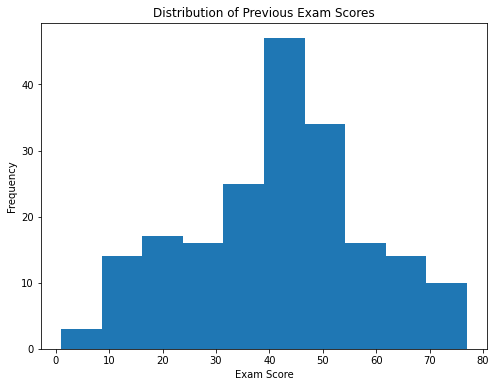

In [21]:
# The distribution of student performance
plt.figure(figsize=(8, 6))
plt.hist(df['Previous_Exam_Score'])
plt.title('Distribution of Previous Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

In [22]:
# relationship between age and exam score
grouped_data_age=df.groupby('Age')['Previous_Exam_Score'].mean()
grouped_data_age

Age
15    47.812500
16    41.541667
17    39.816327
18    42.292683
19    36.653846
Name: Previous_Exam_Score, dtype: float64

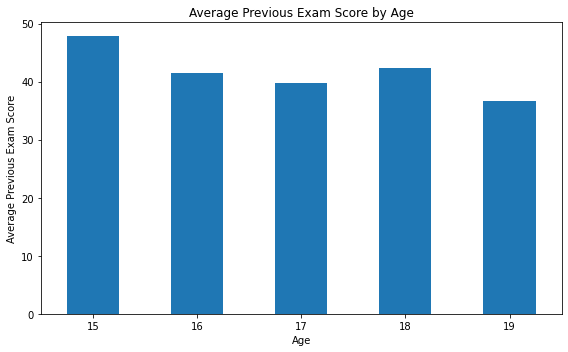

In [23]:
# Plotting the data
plt.figure(figsize=(8, 5))
grouped_data_age.plot(kind='bar')
plt.title('Average Previous Exam Score by Age')
plt.xlabel('Age')
plt.ylabel('Average Previous Exam Score')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [24]:
# exam performance appears to have a slight negative trend with age

In [25]:
# relationship between gender and exam score
grouped_data_gender=df.groupby('Gender')['Previous_Exam_Score'].mean()
grouped_data_gender

Gender
Female    40.888889
Male      42.283019
Name: Previous_Exam_Score, dtype: float64

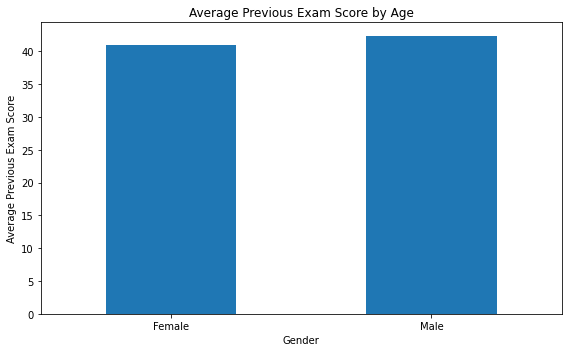

In [26]:
# Plotting the data
plt.figure(figsize=(8, 5))
grouped_data_gender.plot(kind='bar')
plt.title('Average Previous Exam Score by Age')
plt.xlabel('Gender')
plt.ylabel('Average Previous Exam Score')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [27]:
# exam performance seems balanced across gender

In [28]:
# relationship between parental income and exam score
grouped_data_income=df.groupby('Parent_Income_Level')['Previous_Exam_Score'].mean()
grouped_data_income

Parent_Income_Level
High      41.448718
Low       40.824561
Medium    42.655738
Name: Previous_Exam_Score, dtype: float64

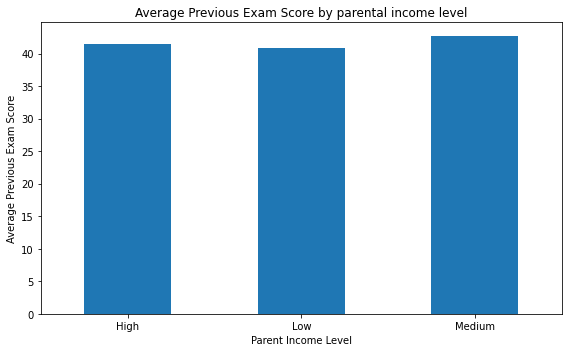

In [29]:
# Plotting the data
plt.figure(figsize=(8, 5))
grouped_data_income.plot(kind='bar')
plt.title('Average Previous Exam Score by parental income level')
plt.xlabel('Parent Income Level')
plt.ylabel('Average Previous Exam Score')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [30]:
# exam performance seems balanced across across parent income level

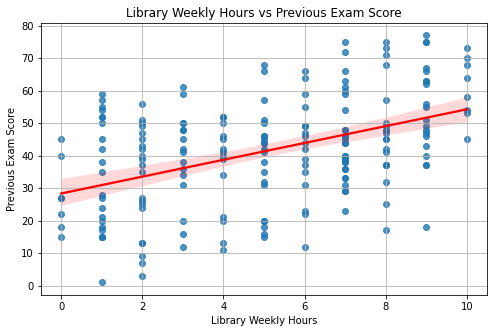

In [31]:
#relationship between library hours and performance
plt.figure(figsize=(8, 5))
sns.regplot(x='Library_weekly_hours', y='Previous_Exam_Score', data=df,line_kws={'color': 'red'})

# Adding labels and title
plt.title('Library Weekly Hours vs Previous Exam Score')
plt.xlabel('Library Weekly Hours')
plt.ylabel('Previous Exam Score')
plt.grid(True)

# Display the plot
plt.show()

In [32]:
# there appears to be an upward trend

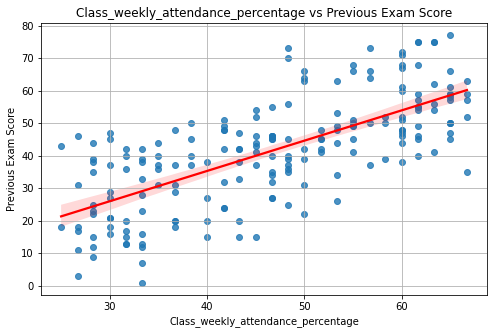

In [33]:
#relationship between Class attendance and performance
plt.figure(figsize=(8, 5))
sns.regplot(x='Class_weekly_attendance_percentage', y='Previous_Exam_Score', data=df,line_kws={'color': 'red'})

# Adding labels and title
plt.title('Class_weekly_attendance_percentage vs Previous Exam Score')
plt.xlabel('Class_weekly_attendance_percentage')
plt.ylabel('Previous Exam Score')
plt.grid(True)

# Display the plot
plt.show()

In [34]:
# there appears to be an upward trend

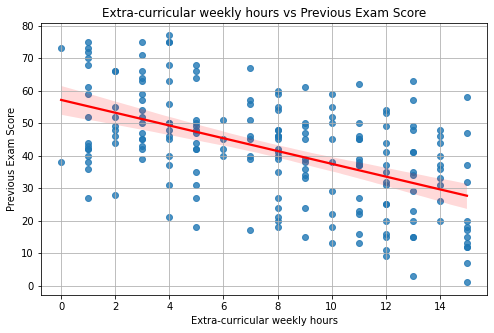

In [35]:
#relationship between Extra-curricular weekly hours and performance
plt.figure(figsize=(8, 5))
sns.regplot(x='Extra-curricular_weekly_hours', y='Previous_Exam_Score', data=df,line_kws={'color': 'red'})

# Adding labels and title
plt.title('Extra-curricular weekly hours vs Previous Exam Score')
plt.xlabel('Extra-curricular weekly hours')
plt.ylabel('Previous Exam Score')
plt.grid(True)

# Display the plot
plt.show()

In [36]:
# there appears to be a downward trend

 ## correlation analysis

In [37]:
# Convert categorical columns to numeric using one-hot encoding
df_encoded = df.copy()
df_encoded.loc[:, 'Gender'] = df_encoded['Gender'].astype('category').cat.codes
df_encoded.loc[:,'Parent_Income_Level'] = df_encoded['Parent_Income_Level'].astype('category').cat.codes

# Calculate correlation of all columns against 'Previous_Exam_Score'
correlation_with_exam_score = df_encoded.corr()['Previous_Exam_Score']

In [38]:
# Drop 'Previous_Exam_Score' from the correlation series
correlation_with_exam_score = correlation_with_exam_score.drop('Previous_Exam_Score')

correlation_with_exam_score

Age                                  -0.151624
Gender                                0.042304
Library_weekly_hours                  0.454597
Class_weekly_attendance_percentage    0.701942
Extra-curricular_weekly_hours        -0.528381
Parent_Income_Level                   0.028532
Name: Previous_Exam_Score, dtype: float64

the correlation anaysis shows that 
- **Class_weekly_attendance_percentage** has a strong positive relationship with exam performance
- **Extra-curricular_weekly_hours** has a moderate negative relationship with exam performance
- **Library_weekly_hours** has a moderate positive relationship with exam performance
- **Age** has a weak negative relationsip with exam performance


- **Gender and Parent_Income_level** dont have a relationship with exam performance

## statisitcal test of significance 

In [39]:
# this section of the analysis would examine if the relationship between the variables are statistically signiciant

# a for loop is used to automate the process


In [40]:
df.head()

,Age,Gender,Library_weekly_hours,Class_weekly_attendance_percentage,Extra-curricular_weekly_hours,Previous_Exam_Score,Parent_Income_Level
0,16,Female,7,36.7,12,31,Medium
1,18,Male,9,41.7,7,51,Medium
2,17,Male,1,31.7,9,15,Low
3,18,Male,7,36.7,13,29,High
4,17,Male,5,46.7,12,35,Low


In [41]:
dependent_var = 'Previous_Exam_Score'

# List of independent variables
independent_vars = [col for col in df.columns if col != dependent_var]

# Initialize a list to store results
results = []

for var in independent_vars:
    if is_numeric_dtype(df[var]):
        # Numerical variable: Perform Pearson correlation
        r_value, p_value = stats.pearsonr(df[var], df[dependent_var])
        results.append({
            'Variable': var,
            'Test': 'Pearson correlation',
            'Statistic': r_value,
            'p-value': p_value
        })
    else:
        # Categorical variable
        categories = df[var].unique()
        if len(categories) == 2:
            # Two categories: Perform independent t-test
            group1 = df[df[var] == categories[0]][dependent_var]
            group2 = df[df[var] == categories[1]][dependent_var]
            t_stat, p_value = stats.ttest_ind(group1, group2)
            results.append({
                'Variable': var,
                'Test': 'Independent t-test',
                'Statistic': t_stat,
                'p-value': p_value
            })
        else:
            # More than two categories: Perform one-way ANOVA
            groups = [df[df[var] == category][dependent_var] for category in categories]
            f_stat, p_value = stats.f_oneway(*groups)
            results.append({
                'Variable': var,
                'Test': 'One-way ANOVA',
                'Statistic': f_stat,
                'p-value': p_value
            })


In [42]:
# Convert the results to a DataFrame and display
results_df = pd.DataFrame(results)
results_df

,Variable,Test,Statistic,p-value
0,Age,Pearson correlation,-0.151624,3.388485e-02
1,Gender,Independent t-test,-0.589755,5.560412e-01
2,Library_weekly_hours,Pearson correlation,0.454597,2.184568e-11
3,Class_weekly_attendance_percentage,Pearson correlation,0.701942,2.078216e-30
4,Extra-curricular_weekly_hours,Pearson correlation,-0.528381,1.729014e-15
5,Parent_Income_Level,One-way ANOVA,0.189661,8.273937e-01


## interpretation of statisitical tests

Statistically Significant Relationships:

- Age: Weak negative correlation with exam scores.
- Library Weekly Hours: Moderate positive correlation with exam scores.
- Class_weekly_attendance_percentage: Strong positive correlation with exam scores.
- Extra-curricular Weekly Hours: Moderate negative correlation with exam scores.


Non-Significant Relationships:

- Gender: No significant difference in exam scores.
- Parent Income Level: No significant difference in exam scores.